In [1]:
import pandas as pd 
import numpy as np
import matplotlib
from scipy.stats import linregress
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [15]:
"""dt_qzvpp=pd.read_pickle('data_hfmp2_def2_qzvpp')
dt_tzvp=pd.read_pickle('data_hfmp2_def2_tzvp')
dt_sto3g=pd.read_pickle("data_hfmp2_sto3G")
dt_sto6g=pd.read_pickle("data_hfmp2_sto6G")
dt_321g=pd.read_pickle("data_hfmp2_321G")
dt_631g=pd.read_pickle("data_hfmp2_631G")
dt_aug=pd.read_pickle("data_hfmp2_aug")
dt_ccpvtz=pd.read_pickle("data_hfmp2_ccpvtz")"""

In [22]:
basisSets=['sto3G', 'sto6G', '321G','631G*','cc-pVTZ','aug-cc-pVQZ','def2-TZVP','def2-QZVPP']
molecule_list=['HAl','HeMg','LiNa','BeNe','BF','CO','NN']
molecules={'HAl':1,'HeMg':2,'LiNa':3,'BeNe':4,'BF':5,'CO':6,'NN':7}
#datasets=[dt_sto3g,dt_sto6g,dt_321g,dt_631g,dt_ccpvtz,dt_aug,dt_tzvp,dt_qzvpp]

In [17]:
"""for df in datasets:
    df['deltaZ']=[molecules[x] for x in df.target]
    df['deltaZ']-=[molecules[x] for x in df.ref]
    df['deltaZ']=np.abs(df['deltaZ'])"""

In [18]:
"""q=[]
for dt in datasets:
    for ao in range(5):
        dfp=dt.query("alchemy==@ao & deltaZ<4 ") #
        dfp['err_alch']=np.abs(dfp['err_alch'])
        dfp['delta_rho_int']=np.asarray((dfp.delta_rho),dtype=int)
        dfp=dfp.sort_values(by='delta_rho')
        for dri in range (2,11):
            try:
                df=dfp.query("delta_rho_int==@dri")
                q.append({'alchemy':ao,'mae':df.err_alch.median(),'delta_rho_int':dri,'basis_set':df.basis_set.array[0]})
            except: pass
"""

C:\Users\zorzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\zorzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
#rho_grouping=pd.DataFrame(q)
#rho_grouping['Log_mae']=np.log10(rho_grouping.mae)
#rho_grouping.to_pickle('rho_grouping')
rho_grouping=pd.read_pickle('rho_grouping')

In [35]:
rho_grouping 

,alchemy,mae,delta_rho_int,basis_set,Log_mae
0,0,0.628733,2,sto3G,-0.201534
1,0,0.979127,3,sto3G,-0.009161
2,0,0.972691,4,sto3G,-0.012025
3,0,2.848963,5,sto3G,0.454687
4,0,4.293212,6,sto3G,0.632782
...,...,...,...,...,...
315,4,0.007375,5,def2-QZVPP,-2.132244
316,4,0.124167,6,def2-QZVPP,-0.905993
317,4,0.076189,7,def2-QZVPP,-1.118109
318,4,0.930332,8,def2-QZVPP,-0.031362


In [28]:
p=[]
for bs in basisSets:
    for ao in range(5):
        x_d=np.asarray(rho_grouping.query('basis_set==@bs & alchemy==@ao').delta_rho_int)
        y_d=np.asarray(rho_grouping.query('basis_set==@bs & alchemy==@ao').Log_mae)
        slope, intercept, r_value, p_value, std_err=linregress(x_d,y_d)
        p.append({'basis_set':bs,'alchemy':ao,'slope':round(slope,3), 'intercept':round(intercept,3)})#, 'r_value':r_value, 'p_value':p_value, 'std_err':std_err})

In [29]:
linregr_data=pd.DataFrame(p)

In [10]:
#https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
"""
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=linregr_data.values,colLabels=linregr_data.columns,loc='center')

#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
pp = PdfPages("trunc_err_linregr_coeffs.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()"""

'\nfig, ax =plt.subplots(figsize=(12,4))\nax.axis(\'tight\')\nax.axis(\'off\')\nthe_table = ax.table(cellText=linregr_data.values,colLabels=linregr_data.columns,loc=\'center\')\n\n#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot\npp = PdfPages("trunc_err_linregr_coeffs.pdf")\npp.savefig(fig, bbox_inches=\'tight\')\npp.close()'

In [51]:
markerD={1:'|',2:'x',3:'^',4:'$4$'}
linestyleAO={1:':',2:'--',3:'-.',4:'-'}

correct_bs={'sto6G':'sto-6G','631G*':'6-31G*','aug-cc-pVQZ':'aug-cc-pVQZ','def2-QZVPP':'def2-QZVPP'}

[Text(0, 0, '10$^{-3}$'),
 Text(0, 0, '0.01'),
 Text(0, 0, '0.1'),
 Text(0, 0, '1')]

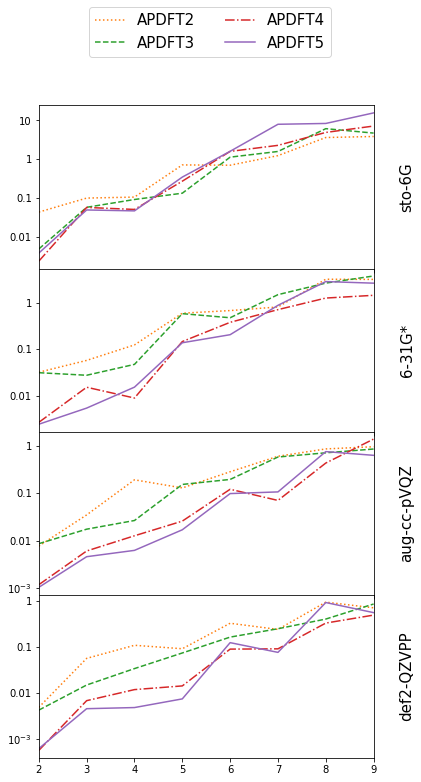

In [64]:
fig,axs=plt.subplots(4,1,figsize=(6,12),sharex=True)
plt.subplots_adjust(hspace=0)
for i in range(4):
    bs=basisSets[i*2+1]
    ax=axs[i]
    for j in range(1,5):
        ao=j
        dt= rho_grouping.query("basis_set==@bs & alchemy==@ao")
        slope,intercept=float(linregr_data.query("basis_set==@bs & alchemy==@ao").slope),\
                        float(linregr_data.query("basis_set==@bs & alchemy==@ao").intercept)
        ax.plot(dt.delta_rho_int, dt.Log_mae,color='C'+str(ao),label="APDFT"+str(ao+1),linestyle=linestyleAO[ao])
      #  ax.plot([1.5,9.5],[1.5*slope+intercept,9.5*slope+intercept],color='C'+str(ao),ls='-.',lw=1)
        ax.set_xlim(2,9)
    ax.annotate(correct_bs[bs],[1.1,.5],rotation=90,xycoords='axes fraction',ha='center',va='center',fontsize=15)

axs[0].legend(loc=(0.15,1.3),ncol=2,fontsize=15)#,xycoords='axes fraction')

axs[0].set_yticks([-2,-1,0,1])
axs[0].set_yticklabels(['0.01','0.1','1','10'])
axs[1].set_yticks([-2,-1,0])
axs[1].set_yticklabels(['0.01','0.1','1'])
axs[2].set_yticks([-3,-2,-1,0])
axs[2].set_yticklabels(['10$^{-3}$','0.01','0.1','1'])
axs[3].set_yticks([-3,-2,-1,0])
axs[3].set_yticklabels(['10$^{-3}$','0.01','0.1','1'])
#plt.savefig('linregr_trunc_err2.jpg')